In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\kmmoh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\Githubupload\phising.csv')

In [3]:
Selected_features = ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
                     'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 
                     'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page',
                     'Statistical_report']


In [4]:
X = df[Selected_features]
y=df['Result']

In [10]:
# Doing the necessary imports
from sklearn.model_selection import train_test_split, GridSearchCV
# splitting the data into training and test set for each cluster one by one
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=36)


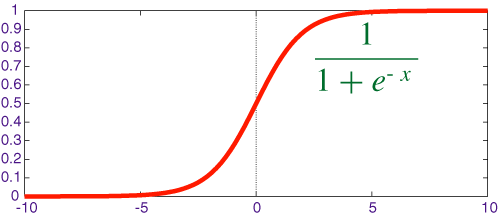


In [11]:
from sklearn.linear_model  import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,log_loss
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

# Log Loss
# SKLearn Implemention
from sklearn.metrics import log_loss
Submissions are scored on log loss:

LogLoss=−1n∑i=1n[yi⋅loge(yi^)+(1−yi)⋅loge(1−yi^)]
 
where:

n  is the number of sample being predicted
yi  is the predicted probability of the video being FAKE
yi  is 1 if the sample is phising, 0 if REAL
log()  is the natural (base e) logarithm

In [12]:
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
acc_log=logreg.score(x_test,y_test)* 100
print("Maximum Logistic Score is {:.2f}%".format(acc_log))

Train/Test split results:
LogisticRegression accuracy is 0.930
LogisticRegression log_loss is 0.178
Maximum Logistic Score is 92.97%


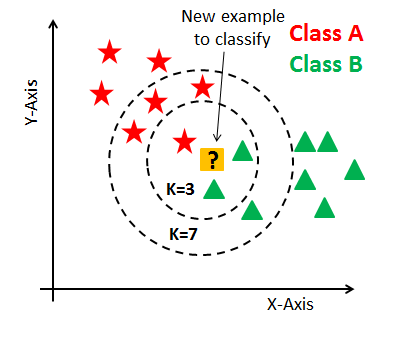

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import model_selection


In [16]:
grid_knn_param = { 'n_neighbors': [1,2,3,4,5,6,7], #default: 5
                   'leaf_size' : [10,17,24,28,30,35],
                    'weights': ['uniform', 'distance'], #default = ‘uniform’
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p':[1,2]}
knn1=KNeighborsClassifier()
# Creating an object of the Grid Search class
grid_knn = GridSearchCV(knn1, grid_knn_param, verbose=3,cv=5)
# finding the best parameters
grid_knn.fit(x_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform;, score=0.936 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform;, score=0.944 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform;, score=0.936 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=0.936 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_siz

[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.935 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.935 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.951 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=0.925 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=0.951 total 

[CV 2/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=1, weights=distance;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=1, weights=distance;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=1, weights=distance;, score=0.936 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=2, weights=uniform;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=2, weights=uniform;, score=0.940 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=2, weights=uniform;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=17, n_neighbors=1, p=2, weights=uniform;, score=0.933 total t

[CV 5/5] END algorithm=auto, leaf_size=17, n_neighbors=4, p=2, weights=distance;, score=0.951 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=uniform;, score=0.925 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=uniform;, score=0.951 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=uniform;, score=0.934 total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=uniform;, score=0.942 total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=uniform;, score=0.942 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=distance;, score=0.936 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=17, n_neighbors=5, p=1, weights=distance;, score=0.944 total t

[CV 4/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=uniform;, score=0.933 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=distance;, score=0.932 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=distance;, score=0.940 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=distance;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=24, n_neighbors=1, p=2, weights=distance;, score=0.933 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=24, n_neighbors=2, p=1, weights=uniform;, score=0.923 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=24, n_neighbors=2, p=1, weights=uniform;, score=0.945 total 

[CV 2/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=1, weights=distance;, score=0.953 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=1, weights=distance;, score=0.953 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=2, weights=uniform;, score=0.943 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=2, weights=uniform;, score=0.923 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=2, weights=uniform;, score=0.936 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=24, n_neighbors=5, p=2, weights=uniform;, score=0.938 total t

[CV 1/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=uniform;, score=0.923 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=uniform;, score=0.945 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=uniform;, score=0.934 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=distance;, score=0.943 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=28, n_neighbors=2, p=1, weights=distance;, score=0.944 total t

[CV 4/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=uniform;, score=0.936 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=uniform;, score=0.938 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=distance;, score=0.952 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=distance;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=28, n_neighbors=5, p=2, weights=distance;, score=0.947 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=28, n_neighbors=6, p=1, weights=uniform;, score=0.921 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=28, n_neighbors=6, p=1, weights=uniform;, score=0.949 total 

[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=1, weights=distance;, score=0.943 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=1, weights=distance;, score=0.939 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.939 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.940 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.929 total t

[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=5, p=2, weights=distance;, score=0.947 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.921 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.949 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.931 total time=   0.2s
[CV 4/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.943 total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.943 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=6, p=1, weights=distance;, score=0.945 total t

[CV 3/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=uniform;, score=0.940 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=uniform;, score=0.929 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=distance;, score=0.930 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=distance;, score=0.941 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=distance;, score=0.945 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=distance;, score=0.940 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=35, n_neighbors=2, p=2, weights=distance;, score=0.936 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.933 total 

[CV 1/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=1, weights=distance;, score=0.945 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=1, weights=distance;, score=0.950 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=1, weights=distance;, score=0.954 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.915 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.948 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.932 total 

[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=distance;, score=0.942 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=distance;, score=0.934 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.934 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.949 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=3

[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance;, score=0.950 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance;, score=0.948 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.920 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.949 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.935 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=6

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=2, p=2, weights=distance;, score=0.941 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=2, p=2, weights=distance;, score=0.934 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=uniform;, score=0.935 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=uniform;, score=0.948 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=3

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=1, weights=distance;, score=0.950 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=1, weights=distance;, score=0.948 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=uniform;, score=0.920 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=uniform;, score=0.949 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=uniform;, score=0.918 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=uniform;, score=0.935 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=6

[CV 5/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=2, p=2, weights=distance;, score=0.934 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=uniform;, score=0.935 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=uniform;, score=0.949 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3, p=1, weights=distance;, score=0.961 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=3

[CV 1/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=uniform;, score=0.947 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=distance;, score=0.956 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=24, n_neighbors=6

[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=uniform;, score=0.935 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=uniform;, score=0.949 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=distance;, score=0.961 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=3

[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=uniform;, score=0.921 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=uniform;, score=0.947 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=uniform;, score=0.934 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=distance;, score=0.956 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6

[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=uniform;, score=0.935 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=uniform;, score=0.949 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance;, score=0.961 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=3

[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=uniform;, score=0.947 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=distance;, score=0.956 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6

[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.935 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.949 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=0.961 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=3

[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.947 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=distance;, score=0.956 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=6

[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.948 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.940 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.962 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.948 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.954 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.942 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=u

[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.934 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=uniform;, score=0.929 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.938 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.948 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, weights=distance;, score=0.944 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform;, score=0.930 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=u

[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.938 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.962 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.948 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.954 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=1, weights=distance;, score=0.941 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=2, weights=uniform;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=2, weights=uniform;, score=0.952 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=2, weights=uniform;, score=0.936 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=3, p=2, weights=u

[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=6, p=2, weights=distance;, score=0.957 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=6, p=2, weights=distance;, score=0.938 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=6, p=2, weights=distance;, score=0.948 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=6, p=2, weights=distance;, score=0.943 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=7, p=1, weights=uniform;, score=0.928 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=7, p=1, weights=uniform;, score=0.948 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=7, p=1, weights=uniform;, score=0.927 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=7, p=1, weights=uniform;, score=0.940 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=7, p=1, weights=un

[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=1, weights=distance;, score=0.954 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=1, weights=distance;, score=0.941 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=uniform;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=uniform;, score=0.951 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=uniform;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=distance;, score=0.937 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=3, p=2, weights=dis

[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=6, p=2, weights=distance;, score=0.945 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=uniform;, score=0.928 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=uniform;, score=0.948 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=uniform;, score=0.930 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=distance;, score=0.941 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=distance;, score=0.959 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=7, p=1, weights=dis

[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=uniform;, score=0.951 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=uniform;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=distance;, score=0.937 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=distance;, score=0.958 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=distance;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, p=2, weights=di

[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=uniform;, score=0.930 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=distance;, score=0.941 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=distance;, score=0.959 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=distance;, score=0.950 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7, p=2, weights=u

[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.937 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.958 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, weights=uniform;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, weights=uniform;, score=0.950 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, weights=u

[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.941 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.959 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.950 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.922 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.942 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=u

[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=2, weights=distance;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.950 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.937 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.942 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, weights=dis

[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=uniform;, score=0.922 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=uniform;, score=0.942 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=uniform;, score=0.919 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=uniform;, score=0.930 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=7, p=2, weights=dis

[CV 2/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=uniform;, score=0.952 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=uniform;, score=0.940 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=uniform;, score=0.941 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=uniform;, score=0.941 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=distance;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=distance;, score=0.943 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=distance;, score=0.950 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=4, p=1, weights=distance;, score=0.9

[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=uniform;, score=0.935 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.954 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.938 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.943 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.943 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=1, p=1, weights=uniform;, score=0.936 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=1, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=1, p=1, weights=uniform;, score=0.9

[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=1, weights=distance;, score=0.943 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=1, weights=distance;, score=0.950 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=1, weights=distance;, score=0.950 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=uniform;, score=0.927 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=uniform;, score=0.942 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=uniform;, score=0.925 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=uniform;, score=0.938 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=4, p=2, weights=distance;, score=0.93

[CV 1/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=uniform;, score=0.936 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=uniform;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=uniform;, score=0.936 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=distance;, score=0.936 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=distance;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=24, n_neighbors=1, p=1, weights=distance;, score=0.93

[CV 4/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=distance;, score=0.935 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=distance;, score=0.935 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=distance;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=24, n_neighbors=4, p=2, weights=distance;, score=0.951 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=24, n_neighbors=5, p=1, weights=uniform;, score=0.925 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=24, n_neighbors=5, p=1, weights=uniform;, score=0.9

[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=1, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=1, weights=distance;, score=0.942 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=1, weights=distance;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=1, weights=distance;, score=0.936 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=2, weights=uniform;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=2, weights=uniform;, score=0.940 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=2, weights=uniform;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=1, p=2, weights=uniform;, score=0.93

[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2, weights=distance;, score=0.951 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=uniform;, score=0.925 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=uniform;, score=0.951 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=uniform;, score=0.934 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=uniform;, score=0.942 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=uniform;, score=0.942 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=distance;, score=0.936 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=distance;, score=0.955 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1, weights=distance;, score=0.94

[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=uniform;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=uniform;, score=0.933 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=distance;, score=0.932 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=distance;, score=0.940 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=distance;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=distance;, score=0.938 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=1, p=2, weights=distance;, score=0.933 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=2, p=1, weights=uniform;, score=0.9

[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.936 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.955 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.944 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.953 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.953 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform;, score=0.943 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform;, score=0.923 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform;, score=0.9

[CV 5/5] END algorithm=brute, leaf_size=35, n_neighbors=1, p=2, weights=distance;, score=0.933 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.923 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.945 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.934 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.934 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance;, score=0.946 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance;, score=0.94

[CV 3/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=0.923 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=0.936 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=0.938 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.933 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.952 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.947 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=35, n_neighbors=6, p=1, weights=uniform;, score=0.9

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 17, 24, 28, 30, 35],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [18]:
grid_knn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 24,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [28]:
# KNN Model
knn = KNeighborsClassifier(algorithm= 'ball_tree',leaf_size= 24,n_neighbors= 4,p= 1,weights= 'distance')
                         
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = knn.score(x_test,y_test)* 100
print("Maximum KNN Score is {:.2f}%".format(acc_knn))
print("log_loss is %2.3f" % log_loss(y_test, y_pred))


Maximum KNN Score is 94.14%
log_loss is 2.025


# 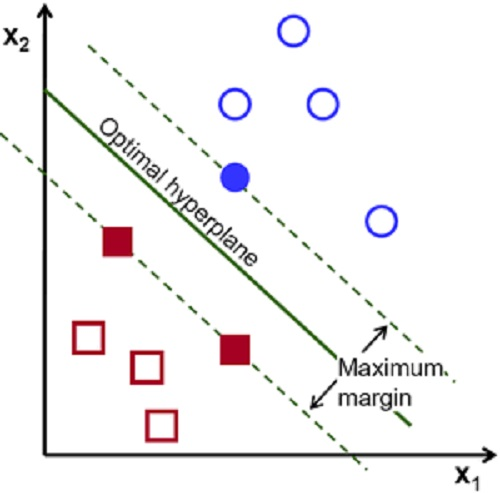

In [ ]:
from sklearn.svm import SVC
grid_svc_params = {"kernel": ['rbf', 'sigmoid'],
                    "C": [0.1, 0.5, 1.0],
                    "random_state": [0, 100, 200, 300]}
sv_classifier=SVC()
#Creating an object of the Grid Search class
grid_svc = GridSearchCV(estimator=sv_classifier, param_grid=grid_svc_params, cv=5,  verbose=3)
#finding the best parameters
grid_svc.fit(x_train, y_train)
#extracting the best parameters
            

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.924 total time=   0.4s
[CV 2/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.931 total time=   0.4s
[CV 3/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.927 total time=   0.5s
[CV 4/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.929 total time=   0.4s
[CV 5/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.921 total time=   0.5s
[CV 1/5] END C=0.1, kernel=rbf, random_state=100;, score=0.924 total time=   0.4s
[CV 2/5] END C=0.1, kernel=rbf, random_state=100;, score=0.931 total time=   0.5s
[CV 3/5] END C=0.1, kernel=rbf, random_state=100;, score=0.927 total time=   0.5s
[CV 4/5] END C=0.1, kernel=rbf, random_state=100;, score=0.929 total time=   0.4s
[CV 5/5] END C=0.1, kernel=rbf, random_state=100;, score=0.921 total time=   0.4s
[CV 1/5] END C=0.1, kernel=rbf, random_state=200;, score=0.924 total time=   0.4s
[CV 2/5] END C=0.1, kernel=rbf, random_st

In [31]:
grid_svc.best_params_

{'C': 1.0, 'kernel': 'rbf', 'random_state': 0}

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=1.0,random_state=0)
svm.fit(x_train, y_train)
acc_svm = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm))

Test Accuracy of SVM Algorithm: 94.33%


In [34]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc = rfc.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))
print("log_loss is %2.3f" % log_loss(y_test, y_pred))

Random Forest Algorithm Accuracy Score : 95.85%
Accuracy for Random Forest on CV data:  0.9584803256445047
log_loss is 1.434


# RandomForest Classification HyperParameter Optimization

In [35]:
# initializing with different combination of parameters
grid_rfc_params = {"n_estimators": [ 800, 1000], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}
rfc1 = RandomForestClassifier()
#Creating an object of the Grid Search class
grid_rfc = GridSearchCV(estimator=rfc1, param_grid=grid_rfc_params, cv=5,  verbose=3)
#finding the best parameters
grid_rfc.fit(x_train, y_train)

#extracting the best parameters


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=800;, score=0.915 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=800;, score=0.922 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=800;, score=0.916 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=800;, score=0.926 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=800;, score=0.918 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=1000;, score=0.915 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=1000;, score=0.924 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=1000;, score=0.912 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=2, max_fe

[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=800;, score=0.924 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=800;, score=0.915 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=1000;, score=0.917 total time=   2.3s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=1000;, score=0.924 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=1000;, score=0.916 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=1000;, score=0.923 total time=   1.9s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=1000;, score=0.914 total time=   2.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [800, 1000]},
             verbose=3)

In [36]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 800}

In [41]:
#rfc2=RandomForestClassifier(random_state=None, max_features='auto', n_estimators= 800, max_depth=3, criterion='entropy')
rfc2=RandomForestClassifier(random_state=1,  n_estimators= 1000)
rfc2.fit(x_train, y_train)
y_pred = rfc2.predict(x_test)
acc_rfc = rfc2.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc_rfc))
print("log_loss is %2.3f" % log_loss(y_test, y_pred))

Random Forest Algorithm Accuracy Score : 95.85%
log_loss is 1.434


In [42]:
print("\nMaximum Logistic Score is {:.2f}%".format(acc_log))
print("Maximum KNN Score is {:.2f}%".format(acc_knn))
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm))
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc_rfc))
print("Random Forest Algorithm  without Hyper tuning Accuracy Score : {:.2f}%".format(acc))


Maximum Logistic Score is 92.97%
Maximum KNN Score is 94.14%
Test Accuracy of SVM Algorithm: 94.33%
Random Forest Algorithm Accuracy Score : 95.85%
Random Forest Algorithm  without Hyper tuning Accuracy Score : 95.85%
